In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from box_detector import OnnxBoxDetector

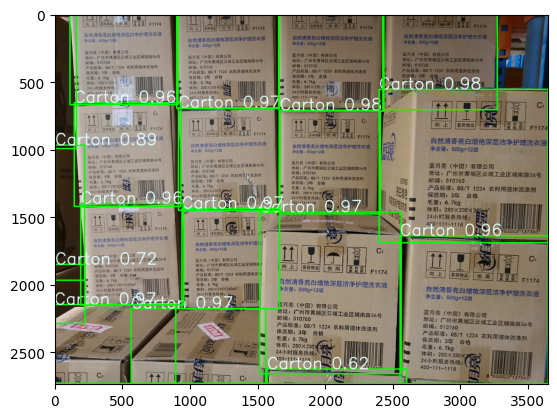

In [4]:
onnx_model_path = "./yolov7-boxes.onnx"
model = OnnxBoxDetector(onnx_model_path)

img = cv2.imread("./data/boxes.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

outputs = model(img)

for box, score in zip(outputs["bboxes"], outputs["scores"]):
    box = box.round().astype(np.int32).tolist()
    name = f"Carton {score:.2f}"
    cv2.rectangle(img, box[:2], box[2:], (0, 255, 0), 10)
    cv2.putText(
        img,
        name,
        (box[0], box[1] - 2),
        cv2.FONT_HERSHEY_SIMPLEX,
        4,
        [225, 255, 255],
        thickness=7,
    )
plt.imshow(img)